Για να τρέξει ο παρακάτω κώδικας πρέπει στα αρχεία να γίνει εισαγωγή του αρχείου 'EEG.machinelearing_data_BRMH.csv' που περιέχει τα δεδομένα από τα οποία εκπαιδεύεται το σύστημα και του αρχείου 'new_eeg_datas.csv' που περιέχει τις τιμές του χρήστη (αυτό το αρχείο το παίρνουμε από το Υποσύστημα 2: Επεξεργασία Σημάτων Ηλεκτροεγκεφαλογραφημάτων).

<ipython-input-18-bf7a57e4495d>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'M': 0, 'F': 1})
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 1743, number of used features: 50
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12573
[LightGBM] [Info] Number of data points in the train set: 1339, number of used features: 50
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Classification Report (specific.disorder):

                                precision    recall  f1-score   support

         Acute stress disorder       0.80      0.90      0.84        48
           Adjustment disorder       0.83      0.90      0.86        48
          Alcohol use disorder       0.76      0.41      0.54        46
 Behavioral addiction disorder       0.64      0.70      0.67        46
              Bipolar disorder       0.91      0.82      0.86        50
           Depressive disorder       0.50      0.32      0.39        50
               Healthy control       0.78      0.83      0.80        47
Obsessive compulsitve disorder       0.91      0.94      0.92        52
                Panic disorder       0.85      0.89      0.87        44
 Posttraumatic stress disorder       0.69      0.94      0.79        49
                 Schizophrenia       0.60      0.61      0.61        54
       Social anxiety disorder       0.81      0.88      0.84        48

                

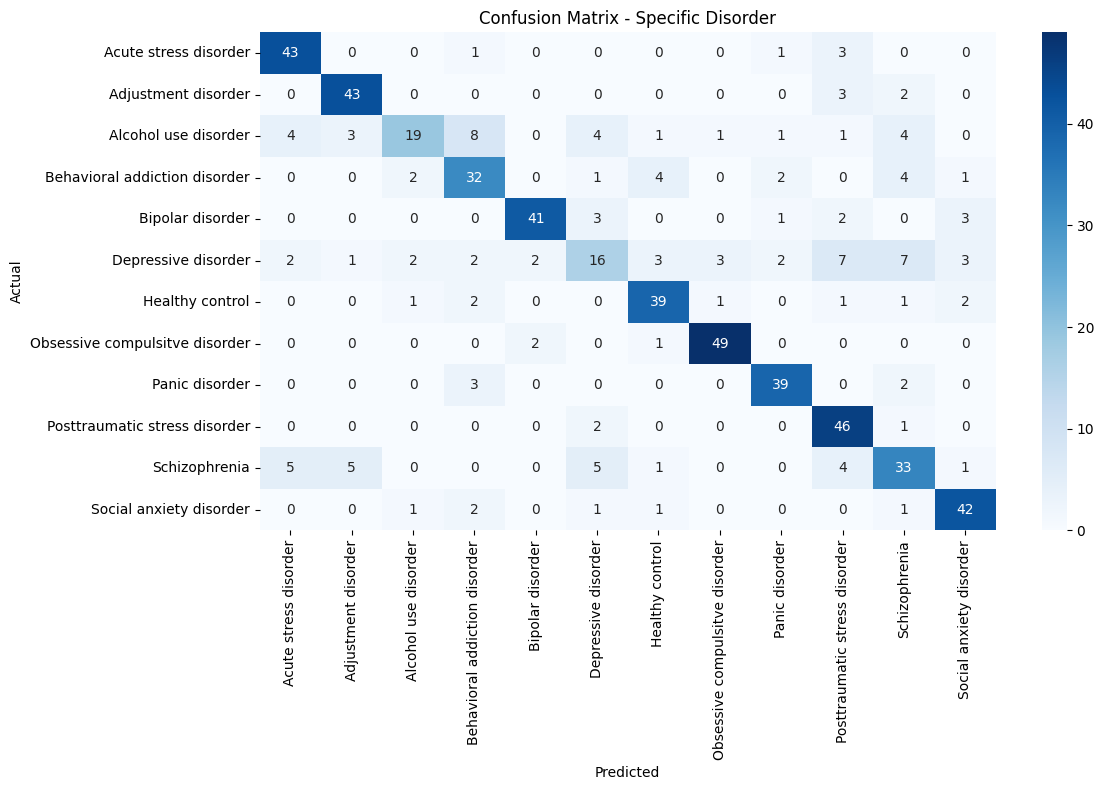


🧠 Προβλέψεις για νέα δεδομένα:
      Specific Disorder       Main Disorder
0  Alcohol use disorder  Addictive disorder
1  Alcohol use disorder  Addictive disorder
2  Alcohol use disorder       Mood disorder


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Specific Disorder,Main Disorder
0,Alcohol use disorder,Addictive disorder
1,Alcohol use disorder,Addictive disorder
2,Alcohol use disorder,Mood disorder


In [ ]:
!pip install lightgbm imbalanced-learn seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import ADASYN
import lightgbm as lgb

df = pd.read_csv('EEG.machinelearing_data_BRMH.csv')#Φόρτωση Δεδομένων
df = df.drop(columns=['Unnamed: 122'], errors='ignore')
df['sex'] = df['sex'].replace({'M': 0, 'F': 1})

X = df.drop(columns=['no.', 'eeg.date', 'education', 'IQ', 'main.disorder', 'specific.disorder'], errors='ignore')
y_specific = df['specific.disorder']
y_main = df['main.disorder']

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
le_specific = LabelEncoder()
y_specific_encoded = le_specific.fit_transform(y_specific)
le_main = LabelEncoder()
y_main_encoded = le_main.fit_transform(y_main)

#Adasyn
adasyn = ADASYN(random_state=42)
X_resampled_specific, y_resampled_specific = adasyn.fit_resample(X_scaled, y_specific_encoded)
X_resampled_main, y_resampled_main = adasyn.fit_resample(X_scaled, y_main_encoded)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split( X_resampled_specific, y_resampled_specific, test_size=0.25, stratify=y_resampled_specific, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_resampled_main, y_resampled_main, test_size=0.25, stratify=y_resampled_main, random_state=42)

selector = SelectKBest(score_func=f_classif, k=50)
X_train_s_sel = selector.fit_transform(X_train_s, y_train_s)
X_test_s_sel = selector.transform(X_test_s)
X_train_m_sel = selector.fit_transform(X_train_m, y_train_m)
X_test_m_sel = selector.transform(X_test_m)

#Εκπαίδευση μοντέλου
model_specific = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
model_specific.fit(X_train_s_sel, y_train_s)
model_main = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
model_main.fit(X_train_m_sel, y_train_m)

#Αξιολόγηση μοντέλου
y_pred_s = model_specific.predict(X_test_s_sel)
y_pred_m = model_main.predict(X_test_m_sel)

print("\n Classification Report (specific.disorder):\n")
print(classification_report(y_test_s, y_pred_s, target_names=le_specific.classes_))
print("\n Classification Report (main.disorder):\n")
print(classification_report(y_test_m, y_pred_m, target_names=le_main.classes_))

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test_s, y_pred_s)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_specific.classes_, yticklabels=le_specific.classes_)
plt.title('Confusion Matrix - Specific Disorder')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#Νεο αρχείο
def predict_from_csv(csv_path):
    new_data = pd.read_csv(csv_path)
    new_data = new_data.drop(columns=['Unnamed: 122'], errors='ignore')
    if 'sex' in new_data.columns:
        new_data['sex'] = new_data['sex'].replace({'M': 0, 'F': 1})
    # Preprocessing
    new_data_imputed = pd.DataFrame(imputer.transform(new_data), columns=new_data.columns)
    new_data_scaled = scaler.transform(new_data_imputed)
    new_data_selected = selector.transform(new_data_scaled)
    # Προβλέψεις
    specific_preds = model_specific.predict(new_data_selected)
    main_preds = model_main.predict(new_data_selected)
    #Αποτελέσματα
    results = pd.DataFrame({
        'Specific Disorder': le_specific.inverse_transform(specific_preds),
        'Main Disorder': le_main.inverse_transform(main_preds)})
    print("\n🧠 Προβλέψεις για νέα δεδομένα:")
    print(results)
    return results

#Αρχείο χρήστη
predict_from_csv('new_eeg_datas.csv')